Handling missing values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('../data/heart_disease.csv')

Missing values

In [3]:
print("Initial missing values:\n", df.isnull().sum())

Initial missing values:
 Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


Seperate numerical and categorical columns

In [4]:
numerical_cols = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 
                  'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']
categorical_cols = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 
                    'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 
                    'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']

Impute numerical columns with median

In [5]:
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

Impute categorical columns with mode (most frequent)

In [6]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

After imputation

In [7]:
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64


Visualization

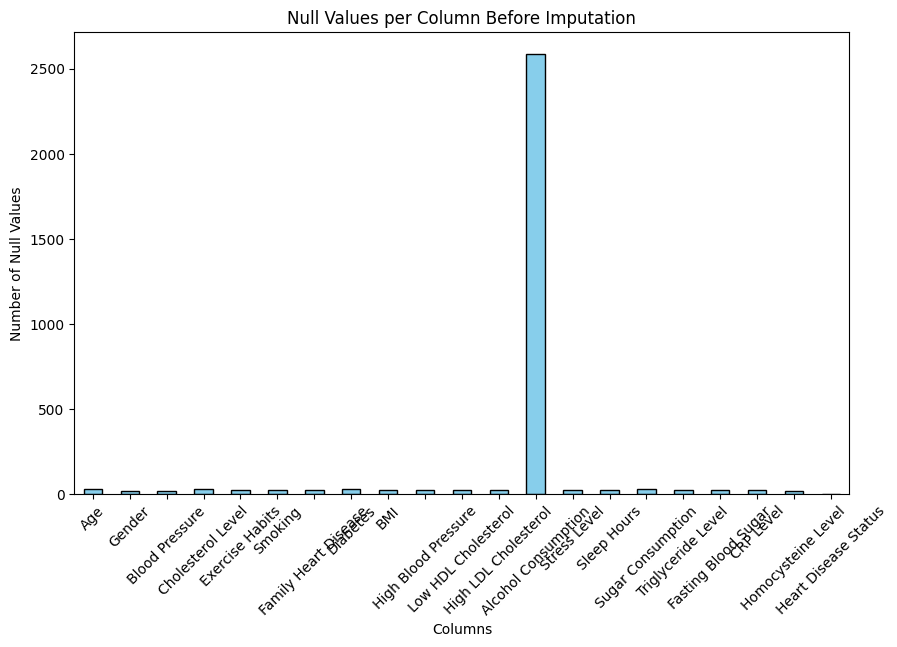

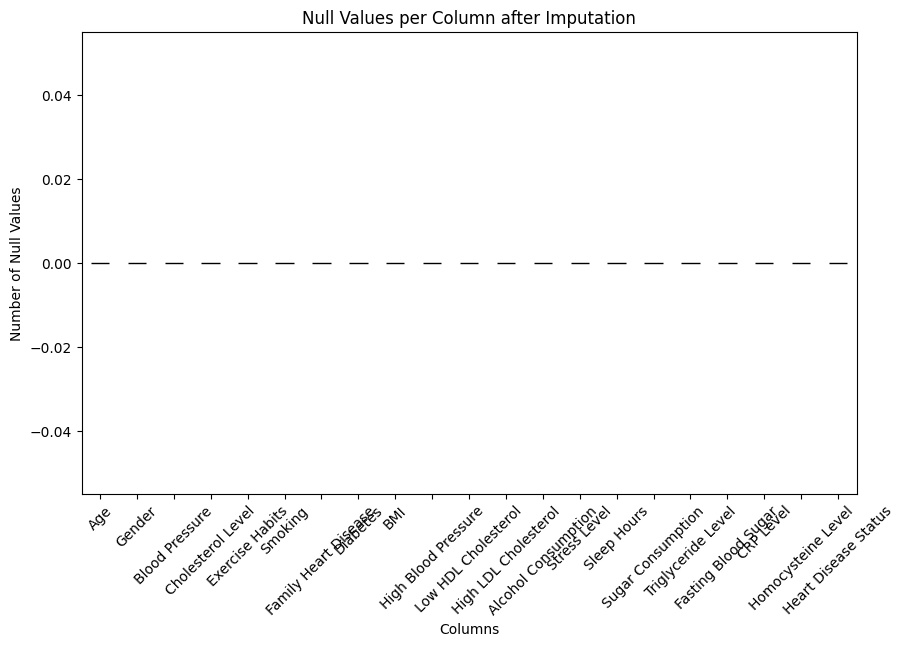

In [8]:
# Calculate null values per column
null_counts = pd.read_csv('../data/heart_disease.csv').isnull().sum()

# Plot histogram (bar chart for better view of columns)
plt.figure(figsize=(10,6))
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Null Values per Column Before Imputation")
plt.xlabel("Columns")
plt.ylabel("Number of Null Values")
plt.xticks(rotation=45)
plt.show()

# Calculate null values per column
null_counts = df.isnull().sum()

# Plot histogram (bar chart for better view of columns)
plt.figure(figsize=(10,6))
null_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Null Values per Column after Imputation")
plt.xlabel("Columns")
plt.ylabel("Number of Null Values")
plt.xticks(rotation=45)
plt.show()

Remove outliers

In [9]:
import numpy as np

Numerical columns for outlier detection

In [10]:
numerical_cols = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 
                  'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

Remove outliers using IQR

In [11]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

EDA Visualization

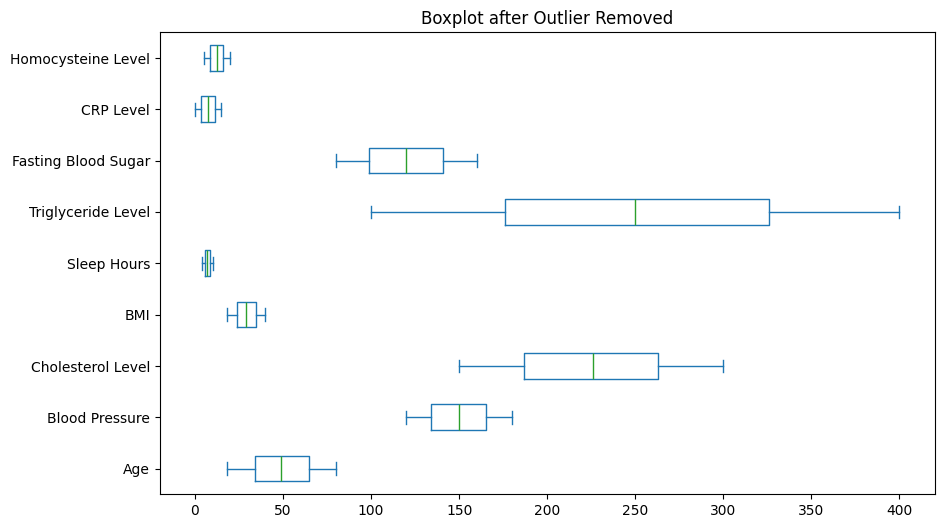

In [12]:
df.plot(kind='box', figsize=(10,6), vert=False)
plt.title("Boxplot after Outlier Removed")
#plt.savefig('member2.png')
plt.show()

Encode categorical variables

In [16]:
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

Identify categorical columns

In [13]:
nominal_cols = ['Gender', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 
                'Low HDL Cholesterol', 'High LDL Cholesterol']
ordinal_cols = ['Exercise Habits', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
ordinal_categories = [
    ['Low', 'Medium', 'High'],  # Exercise Habits
    ['None', 'Low', 'Medium', 'High'],  # Alcohol
    ['Low', 'Medium', 'High'],  # Stress
    ['Low', 'Medium', 'High']   # Sugar
]

One-hot encode for nominal columns

In [17]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
nominal_encoded = onehot_encoder.fit_transform(df[nominal_cols])
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_cols))

Ordinal encode ordinal

In [18]:
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
ordinal_encoded = ordinal_encoder.fit_transform(df[ordinal_cols])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=ordinal_cols)

Combine back with numerical columns and target

In [19]:
numerical_target_cols = df.drop(columns=nominal_cols + ordinal_cols)
df_encoded = pd.concat([numerical_target_cols, nominal_encoded_df, ordinal_encoded_df], axis=1)

Show before/after

In [20]:
print("Before encoding (sample):\n", df[nominal_cols + ordinal_cols].head())
print("After encoding (sample):\n", df_encoded.head())

Before encoding (sample):
    Gender Smoking Family Heart Disease Diabetes High Blood Pressure  \
0    Male     Yes                  Yes       No                 Yes   
1  Female      No                  Yes      Yes                  No   
2    Male      No                   No       No                  No   
3  Female     Yes                  Yes       No                 Yes   
4    Male     Yes                  Yes      Yes                 Yes   

  Low HDL Cholesterol High LDL Cholesterol Exercise Habits  \
0                 Yes                   No            High   
1                 Yes                   No            High   
2                 Yes                  Yes             Low   
3                  No                  Yes            High   
4                  No                   No             Low   

  Alcohol Consumption Stress Level Sugar Consumption  
0                High       Medium            Medium  
1              Medium         High            Medium  
2       

In [29]:
df_encoded.to_csv('../data/after_encoded.csv', index=False)

Visualization

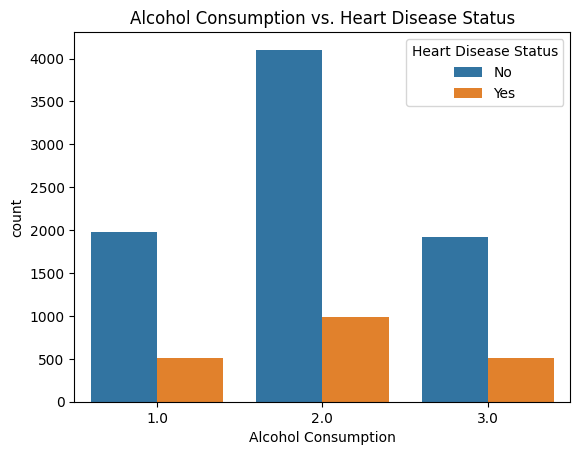

In [21]:
sns.countplot(data=df_encoded, x='Alcohol Consumption', hue='Heart Disease Status')
plt.title('Alcohol Consumption vs. Heart Disease Status')
plt.show()

In [30]:
df = df_encoded

Balance the dataset using oversampling

In [32]:
# Separate majority 'No' and minority 'Yes' classes
df_majority = df[df['Heart Disease Status'] == 'No']
df_minority = df[df['Heart Disease Status'] == 'Yes']

# Oversample minority class to match majority class
df_minority_oversampled = df_minority.sample(len(df_majority), replace=True, random_state=42)

# Combine oversampled minority with majority class
df_balanced = pd.concat([df_majority, df_minority_oversampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Replace df with oversampled dataset
df = df_balanced

print("Class distribution after oversampling:")
print(df['Heart Disease Status'].value_counts())

Class distribution after oversampling:
Heart Disease Status
Yes    8000
No     8000
Name: count, dtype: int64


In [33]:
target_col = 'Heart Disease Status'
counts = df[target_col].value_counts()
print(counts)

Heart Disease Status
Yes    8000
No     8000
Name: count, dtype: int64


show target colum count

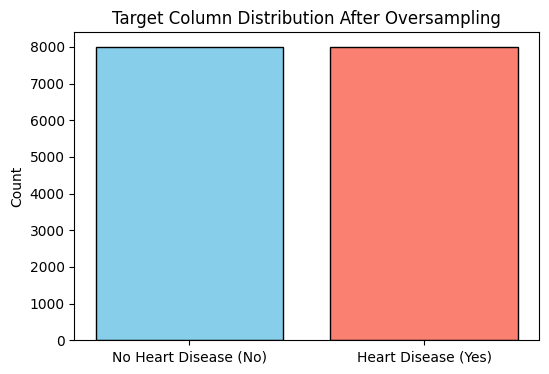

In [34]:
# Count of each class
target_counts = df['Heart Disease Status'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(target_counts.index, target_counts.values, color=['skyblue', 'salmon'], edgecolor='black')
plt.xticks([0, 1], ['No Heart Disease (No)', 'Heart Disease (Yes)'])
plt.ylabel('Count')
plt.title('Target Column Distribution After Oversampling')
plt.show()

Feature Selection

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

Encode target for selection

In [36]:
le = LabelEncoder()
df['Heart Disease Status'] = le.fit_transform(df['Heart Disease Status'])

In [37]:
X = df.drop('Heart Disease Status', axis=1).select_dtypes(include='number')  # Numerical only for f_classif
y = df['Heart Disease Status']

Select top 10 features

In [38]:
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_cols = X.columns[selector.get_support()]

print("Selected features:", selected_cols)

Selected features: Index(['Blood Pressure', 'BMI', 'Fasting Blood Sugar', 'Homocysteine Level',
       'Gender_Male', 'Smoking_Yes', 'Family Heart Disease_Yes',
       'High LDL Cholesterol_Yes', 'Exercise Habits', 'Stress Level'],
      dtype='object')


New DF with selected

In [39]:
df_selected = pd.concat([pd.DataFrame(X_selected, columns=selected_cols), pd.Series(y, name='Heart Disease Status')], axis=1)

EDA Visualization: Correlation matrix of selected features

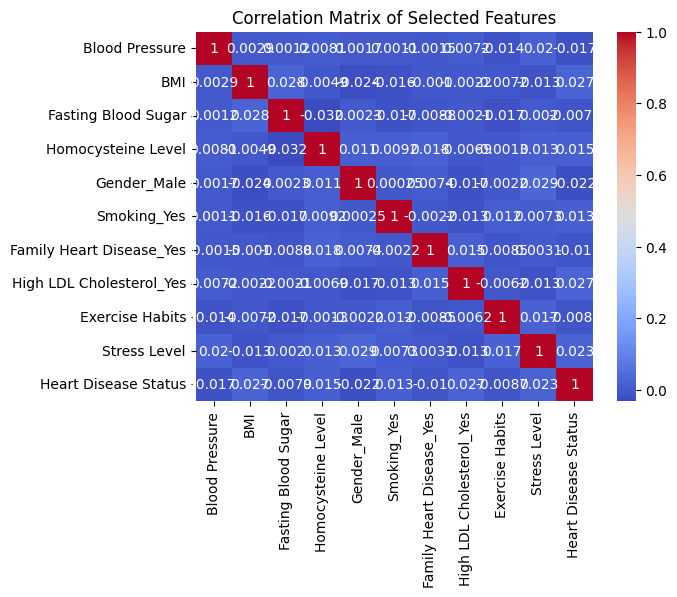

In [40]:
corr = df_selected.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [42]:
df_selected.to_csv('../data/final_processed_dataset.csv', index=False)